<a href="https://colab.research.google.com/github/Kelly002/Modelo_de_Churn_Challenge/blob/main/challenge_dados_2S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalendo a biblioteca utils
#!pip install utils
#from utils import *

#!pip install python_utils

#!pip install matplotlib==3.1.0


In [2]:
import sys
sys.path.append('../')

# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Criação do boxplot
from plotly.express import box

# Criação dos modelos de machine learning
#from python_utils import utils
#from utils.utils import plot_countplot, plot_matriz_confusao, compara_modelos_metricas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter


# Otimizando os modelos de machine learning
from sklearn.model_selection import GridSearchCV

# Mudando o estilo dos gráficos
sns.set_theme(style="darkgrid")

# Definindo o SEED para reprodução dos resultados
SEED = 42



# 1° Semana - Limpeza da base 📈

Nessa primeira semana temos que buscar os dados que estão em formatos (dicionário e json) e tabelas distintas. Entender e interpretar cada valor que consta na tabela.

Fazer a análise estatística dos dados, utilizando gráficos e o que for necessário para extrair insights.

Fazer o tratamento de valores ausentes, nulos e dispares.

Realizar se necessário a engenharia de features e a normalização dos dados.

Finalizar a semana rodando um primeiro modelo de classificação.

## Carregando os dados

In [3]:
# Carrega os dados
df = pd.read_json('https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json')
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# Colunas existentes na base

df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

## Abrindo os dicionários de dados

In [5]:
# customerID: numero de identificao unico de cada cliente
# Esse campo possui dois tipos de dados distintos: numerico e alfanumerico

df['customerID']

0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7262    9987-LUTYD
7263    9992-RRAMN
7264    9992-UJOEL
7265    9993-LHIEB
7266    9995-HOTOH
Name: customerID, Length: 7267, dtype: object

In [6]:
# Churn: se o cliente deixou ou nao a empresa
# este campo é formado por: No, Yes e Vazio
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [7]:
# customer: é um outro dicionário

# gender: genero (masculino e feminino)
# SeniorCitizen: informacao sobre um cliente ter ou nao idade igual ou maior que 65 anos
# Partner:  se o cliente possui ou nao um parceiro ou parceira
# Dependents: se o cliente possui ou nao dependentes
# tenure:  meses de contrato do cliente

df['customer'][0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [8]:
##############################################################################
#      Converte a coluna 'customer' que é um dicionário em um dataframe df1
##############################################################################

#gera uma lista com os valores da variável gender
gender = []
#gera uma lista com os valores da variável SeniorCitizen
senior =[]
#gera uma lista com os valores da variável Partner
partner = []
#gera uma lista com os valores da variável Dependents
dependent = []
#gera uma lista com os valores da variável tenure
tenure = []

for i in df['customer']:
  aux_gender = i['gender']
  aux_seior = i['SeniorCitizen']
  aux_partner = i['Partner']
  aux_dependent = i['Dependents']
  aux_tenure = i['tenure']
  gender.append(aux_gender)
  senior.append(aux_seior)
  partner.append(aux_partner)
  dependent.append(aux_dependent)
  tenure.append(aux_tenure)

# utiliza a função zip para gerar uma unica lista com todas os valores das saidas
aux = list(zip(gender,senior, partner,dependent, tenure))

# junta tudo em um único dataframe df1
df1 = pd.DataFrame(aux, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])


In [9]:
# mostrta o dataframe gerado
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [10]:
# phone: é um outro dicionário

# PhoneService: assinatura de servico telefonico
# MultipleLines: assisnatura de mais de uma linha de telefone

#df['phone'][1]['PhoneService']
df['phone'][1]

{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}

In [11]:
##############################################################################
#      Converte a coluna 'phone' que é um dicionário em um dataframe df2
##############################################################################

#gera uma lista com os valores da variável PhoneService
service = []
#gera uma lista com os valores da variável MultipleLines
lines =[]

# percorre todo o diconário
for i in df['phone']:
  aux_service = i['PhoneService']
  aux_lines = i['MultipleLines']
  service.append(aux_service)
  lines.append(aux_lines)

# utiliza a função zip para gerar uma unica lista com todas os valores das saidas
aux = list(zip(service, lines))

# junta tudo em um único dataframe df1
df2 = pd.DataFrame(aux, columns = ['PhoneService', 'MultipleLines'])

In [12]:
df2.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [13]:
# internet: é outro dicionário

# InternetService: assinatura de um provedor internet
# OnlineSecurity: assinatura adicional de seguranca online
# OnlineBackup: assinatura adicional de backup online
# DeviceProtection: assinatura adicional de protecao no dispositivo
# TechSupport: assinatura adicional de suporte tecnico, menos tempo de espera
# StreamingTV: assinatura de TV a cabo
# StreamingMovies: assinatura de streaming de filmes

df['internet'][1]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'No',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'Yes'}

In [14]:
##############################################################################
#      Converte a coluna 'internet' que é um dicionário em um dataframe df3
##############################################################################

#gera uma lista com os valores da variável InternetService
internet = []
#gera uma lista com os valores da variável OnlineSecurity
security =[]
#gera uma lista com os valores da variável OnlineBackup
backup = []
#gera uma lista com os valores da variável DeviceProtection
protection = []
#gera uma lista com os valores da variável TechSupport
support = []
#gera uma lista com os valores da variável StreamingTV
streaming = []
#gera uma lista com os valores da variável StreamingMovies
movies = []

for i in df['internet']:
  aux_internet = i['InternetService']
  aux_security = i['OnlineSecurity']
  aux_backup = i['OnlineBackup']
  aux_protection = i['DeviceProtection']
  aux_support = i['TechSupport']
  aux_streaming = i['StreamingTV']
  aux_movies = i['StreamingMovies']
  internet.append(aux_internet)
  security.append(aux_security)
  backup.append(aux_backup)
  protection.append(aux_protection)
  support.append(aux_support)
  streaming.append(aux_streaming)
  movies.append(aux_movies)

# utiliza a função zip para gerar uma unica lista com todas os valores das saidas
aux = list(zip(internet,security, backup, protection, support, streaming, movies))

# junta tudo em um único dataframe df1
df3 = pd.DataFrame(aux, columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])


In [15]:
df3.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [16]:
# account é outro dicionário

# Contract: tipo de contrato
# PaperlessBillin: se o cliente prefere receber online a fatura
# PaymentMethod: forma de pagamento
# Charges.Monthly: total de todos os serviÃ§os do cliente por mÃªs

df['account'][0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [17]:
##############################################################################
#      Converte a coluna 'account' que é um dicionário em um dataframe df4
##############################################################################

#gera uma lista com os valores da variável Contract
contract = []
#gera uma lista com os valores da variável PaperlessBilling
biling =[]
#gera uma lista com os valores da variável PaymentMethod
method = []
#gera uma lista com os valores da variável Charges
charge = []

# percorre todo o dicionário
for i in df['account']:
  aux_contract = i['Contract']
  aux_biling = i['PaperlessBilling']
  aux_method = i['PaymentMethod']
  aux_charge = i['Charges']
  contract.append('aux_contract')
  biling.append(aux_biling)
  method.append(aux_method)
  charge.append(aux_charge)

# utiliza a função zip para gerar uma unica lista com todas os valores das saidas
aux = list(zip(contract, biling, method, charge))

# junta tudo em um único dataframe df1
df4 = pd.DataFrame(aux, columns = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])


In [18]:
df4.head()

,Contract,PaperlessBilling,PaymentMethod,Charges
0,aux_contract,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,aux_contract,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,aux_contract,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,aux_contract,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,aux_contract,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [19]:
# O 'Charges' é um outro dicionario

df4['Charges'][0]

{'Monthly': 65.6, 'Total': '593.3'}

In [20]:
##############################################################################
#      Converte a Contract 'Charges' que é um dicionário em um dataframe df5
##############################################################################

#gera uma lista com os valores da variável Monthly
month = []
#gera uma lista com os valores da variável Total
total =[]

# percorre todo o diconário
for i in df4['Charges']:
  aux_month = i['Monthly']
  aux_total = i['Total']
  month.append(aux_month)
  total.append(aux_total)

# utiliza a função zip para gerar uma unica lista com todas os valores das saidas
aux = list(zip(month, total))

# junta tudo em um único dataframe df1
df5 = pd.DataFrame(aux, columns = ['Monthly', 'Total'])

In [21]:
df5.head()

,Monthly,Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


Todo esse processo que fiz abrindo uma tabela por vez poderia ser minimizado utilizando o método normalize

In [22]:
## importa a biblioteca
# import json

## coloca os dados em f
# with open('../Dados/Telco-Customer-Churn.json', 'r') as f:

## normaliza os dados que estão em f, trazendo todos os valores dos dicionários para colunas únicas
# dados = json.load(f)

## Juntando os dataframes gerados em um único

In [23]:
# Verifica o tamanho de todos os dataframes gerados

print(len(df))
print(len(df['customerID']))
print(len(df['Churn']))
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))
print(len(df5))

7267
7267
7267
7267
7267
7267
7267
7267


In [24]:
# Junta todos os dataframes com a função concat

df_final = pd.concat([df['customerID'], df['Churn'],df1, df2, df3,  df4, df5], axis = 1, join='inner')
df_final.head(3)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,aux_contract,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,aux_contract,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,aux_contract,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85


In [25]:
# Verifica o tamanho do dataframe final gerado

len(df_final)

7267

In [26]:
# Verifica as colunas do dataframe final gerado

df_final.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges', 'Monthly', 'Total'],
      dtype='object')

In [27]:
# Vamos deletar a coluna 'Charges' pois, suas informações estão nas colunas 'Monthly', 'Total'

df_final.drop(columns='Charges', axis = 1, inplace = True)

In [28]:
# Verifica os tipos dos dados do novo dataframe

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [29]:
# Salva o novo dataframe em um csv
# Retira o index pra não ser gerado dois na leitura

df_final.to_csv('churn.csv', index=False)

## Analisando os dados

In [30]:
# Faz a leitura do arquivo que foi salvo em .csv

churn = pd.read_csv('churn.csv')
churn.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,aux_contract,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,aux_contract,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,aux_contract,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,aux_contract,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,aux_contract,Yes,Mailed check,83.9,267.4


In [31]:
# Tipagem dos dados

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [32]:
# Mostra as medidas estatísticas, das variavies numericas

# inclui as medidas estatísticas dos dados categóricos nas análises mas, algumas informações são perdidas com isso.
#churn.describe(include = [object].)T

churn.describe()

,SeniorCitizen,tenure,Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


## Traduzindo as colunas

1) 'customerID': identificar único da opração

2) 'Churn': Yes se houve o churn, No caso contrário

3) 'gender': 'Female' se feminino e 'Male' se masculino

4) 'SeniorCitizen': '1' se o cliente for maior que 65 anos e '0' caso contrário

5) 'Partner': 'Yes'se o cliente possui um parceiro 'No' caso contrário

6) 'Dependents': 'Yes' se possui dependente e 'No' se não possui dependente

7) 'tenure': tempo do contrato em meses

8) 'PhoneService': Yes se possui telefone de serviço e No caso contrário

9) 'MultipleLines': 'No' se não possui vários telefone de serviço, 'Yes' se possui vários telefone de serviço e 'No phone service' se não possui telefone.

10) 'InternetService': os tipos de serviços que o cliente possui:'DSL', 'Fiber optic' e 'No' não possui

11) 'OnlineSecurity': 'Yes' se assinatura adicional de seguranaçã online, 'No' caso contrário e 'No internet service' se o cliente não possuir o serviço.

12) 'OnlineBackup': 'Yes' se possuir assinatura adicional de backup online, 'No' caso contrário e 'No internet service' se o cliente não possuir o serviço.

13) 'DeviceProtection': 'Yes' se possuir assinatura adicional de proteção no dispositivo, 'No' caso contrário e 'No internet service' se o cliente não possuir o serviço.

14) 'TechSupport': 'Yes' se possuir assinatura adicional de suporte técnico, menos tempo de espera, 'No' caso contrário e 'No internet service' se o cliente não possuir o serviço.

15) 'StreamingTV': 'Yes' se possuir assinatura de TV a cabo, 'No' caso contrário e 'No internet service' se o cliente não possuir o serviço.

16) 'StreamingMovies':'Yes' se possuir assinatura de streaming de filmes, 'No' caso contrário e 'No internet service' se o cliente não possuir o serviço.

17) 'Contract': 'aux_contract' descreve o tipo de contrato

18) 'PaperlessBilling': 'Yes' se o cliente prefere receber online a fatura e 'No' caso contrário.

19) 'PaymentMethod': forma de pagamento como: 'Mailed check' 'Electronic check' 'Credit card (automatic)', 'Bank transfer (automatic)'

20) 'Monthly': 1585 valores distintos para descrever o total de todos os servições do cliente por mês

21) 'Total': 6531 valores distintos para descrvere o total gasto pelo cliente.

In [33]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [34]:
# vamos separar as colunas numericas e categóricas

# cria uma lista com as colunas que são do tipo numerica
variavel_numerica = []
# cria uma lista com as colunas que são do tipo categorica
variavel_categorica = []

for i in churn.columns.tolist():
  if churn.dtypes[i] == 'object':
    variavel_categorica.append(i)
  else:
    variavel_numerica.append(i)


## Analise estatística das variáveis

Variáveis numéricas: vamos analisar as variáveis numéricas vamos fazer o box plot dos dados

In [35]:
variavel_numerica

['SeniorCitizen', 'tenure', 'Monthly']

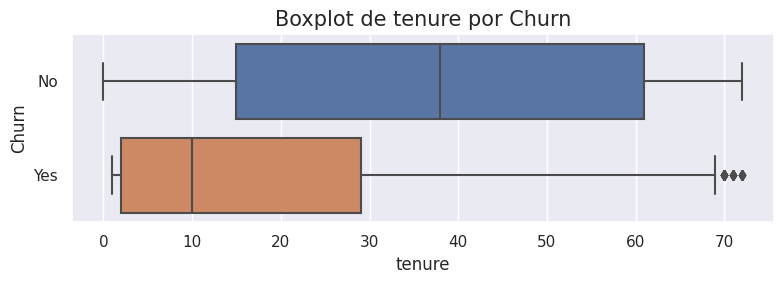

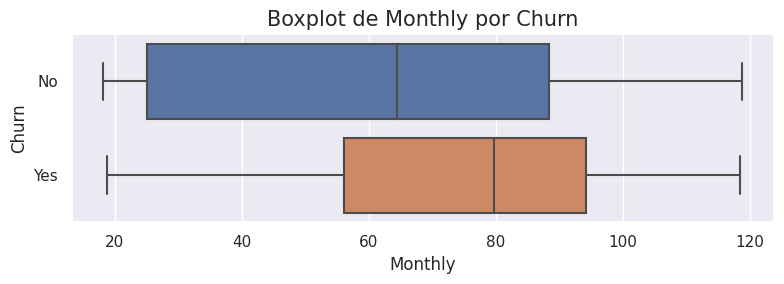

In [36]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [8,3]
plt.rcParams["figure.autolayout"] = np.True_

for col in ['tenure', 'Monthly' ]:
  sns.boxplot(data = churn, x=col, y ='Churn')
  plt.title(f"Boxplot de {col} por Churn", fontsize=15)
  plt.show()

Para o primeiro conjuto de dados podemos concluir que os clientes que estão a mais tempo tendem a continuar utilizando o serviço.

Já para o segundo caso, clientes que possuem serviços mais baratos, tendem a continuar utilizando o serviço.

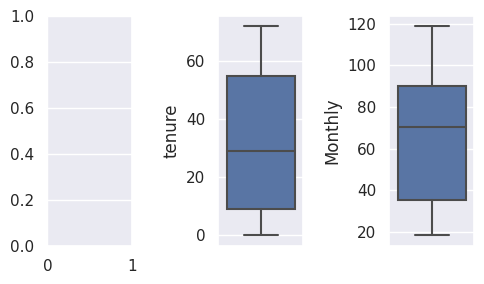

In [37]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]
plt.rcParams["figure.autolayout"] = np.True_

# definindo os subplots
f, axes = plt.subplots(1,3)

# coloca cada informação em um plot distinto
sns.boxplot(data = churn, y =churn['tenure'], ax = axes[1])
sns.boxplot(data = churn, y =churn['Monthly'], ax = axes[2])
plt.show()

# para os valores numéricos podemos perceber que não existem autliers
# o tempo máximo de contratação é de 70 meses e a média é de 30 meses, sendo 10 meses o prazo minimo. Neste caso tb, podemos reescrever a variável em faixas de valores
# Como a variével "Monthly" possui muitos valores distintos, vamos reescreva-la em faixas de valores

Variáveis categóricas: para analisar vamos fazer gráficos de dispersão

In [38]:
variavel_categorica

['customerID',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Total']

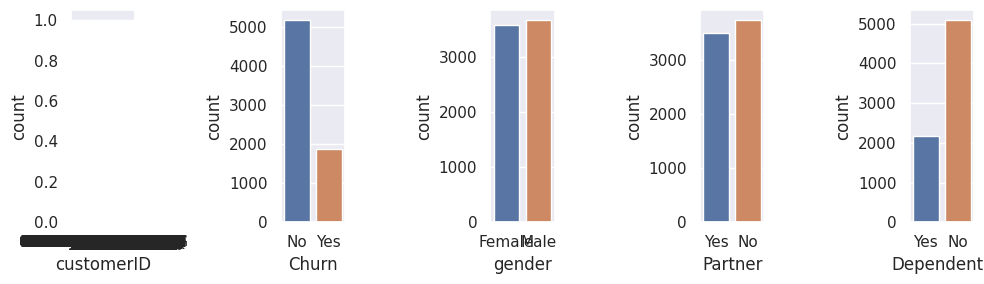

In [39]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,3]
plt.rcParams["figure.autolayout"] = np.True_

# definindo os subplots
f, axes = plt.subplots(1,5)

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['customerID'], ax = axes[0])
sns.countplot(data = churn, x =churn['Churn'], ax = axes[1])
sns.countplot(data = churn, x =churn['gender'], ax = axes[2])
sns.countplot(data = churn, x =churn['Partner'], ax = axes[3])
sns.countplot(data = churn, x =churn['Dependents'], ax = axes[4])
plt.show()

Como o customerID é um identifocador único, vamos retira-lo da base.

Podemos percebre que a variável "Churn" é desbalanceada.

O mesmo acontece com a variável "Dependente"

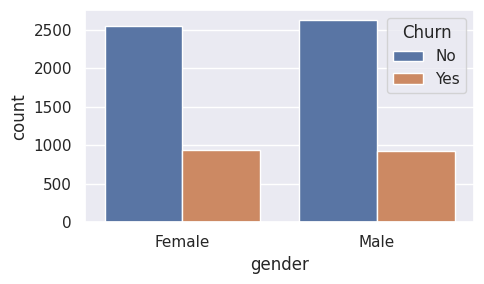

In [40]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['gender'], hue='Churn')

plt.show()

Aqui, podemos notar que não faz diferença ser do sexo feminino ou masculino para que aconteça o Churn. A distribuição é a mesma para os dois casos.

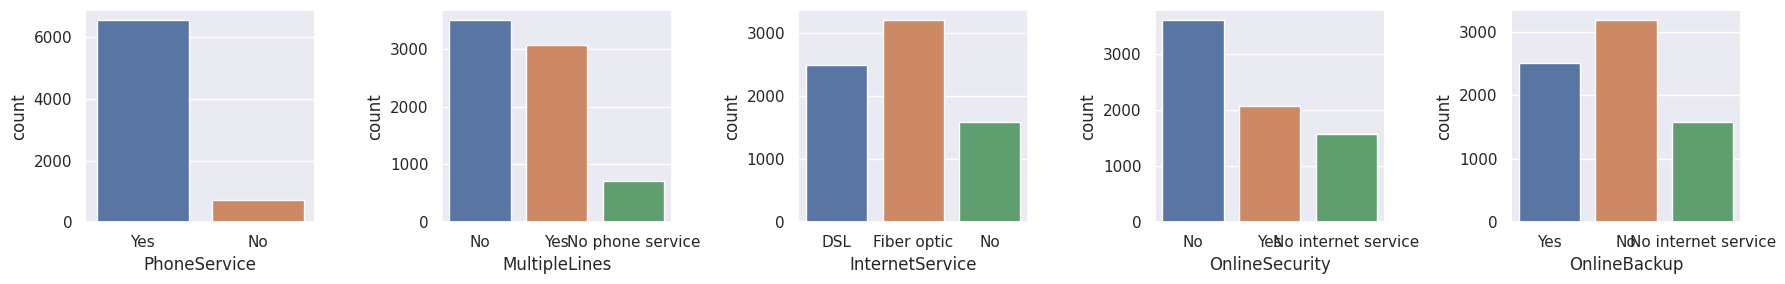

In [41]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [18,3]
plt.rcParams["figure.autolayout"] = np.True_

# definindo os subplots
f, axes = plt.subplots(1,5)

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['PhoneService'], ax = axes[0])
sns.countplot(data = churn, x =churn['MultipleLines'], ax = axes[1])
sns.countplot(data = churn, x =churn['InternetService'], ax = axes[2])
sns.countplot(data = churn, x =churn['OnlineSecurity'], ax = axes[3])
sns.countplot(data = churn, x =churn['OnlineBackup'], ax = axes[4])
plt.show()


Podemos percebre que a variável "phoneSErvice" é desbalanceada

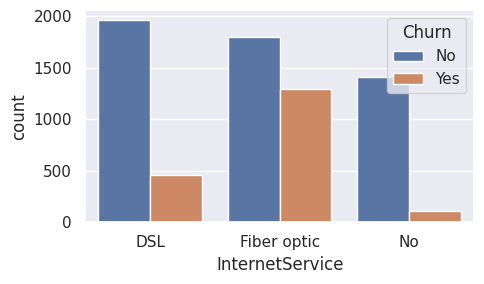

In [42]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['InternetService'], hue='Churn')

plt.show()

Neste caso,  podemos perceber que a Internet de Fibra Ótica possui mais casos de Churn.

Já o DSL é o caso que possui menos casos de Churn. Logo, a empresa poderia ofertar mais esse tipo de produto.

A empresa também poderia tentar identificar quais os problemas que causam esse numéro elevado de Churn na Fibra Ótica.

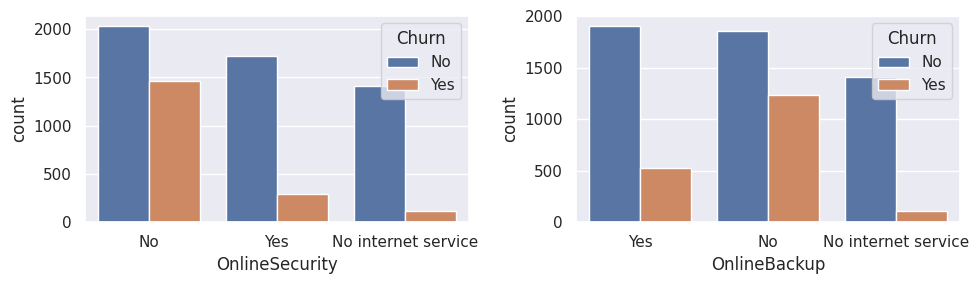

In [43]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,3]

# definindo os subplots
f, axes = plt.subplots(1,2)

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['OnlineSecurity'], hue='Churn', ax=axes[0])
sns.countplot(data = churn, x =churn['OnlineBackup'], hue='Churn', ax=axes[1])

plt.show()

De acordo com os dois gráficos podeos concluir que os cliente que não possuem o Serviço Online de Segurança e o Backup tendem a ter um número maior de Churn.

Logo, oferecer esses dois serviços seria uma boa opçõa para reduzir a taxa de cancelamneto.

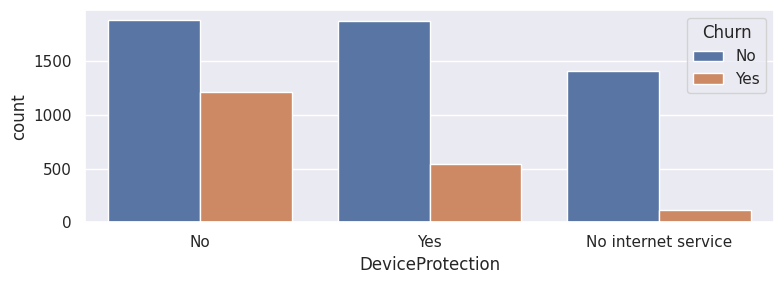

In [44]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [8,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['DeviceProtection'], hue='Churn')

plt.show()

A mesma coisa acontece para com os clientes que não possuem a proteção do Device.

Uma boa alternativa, é oferta a venda desse produto para diminuir a taxa de cancelamentos também.

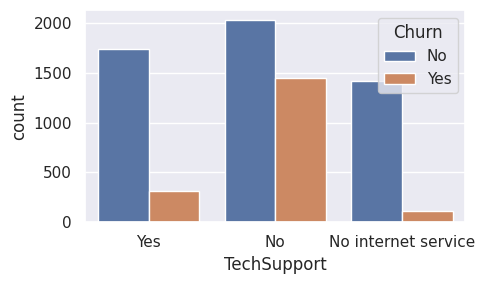

In [45]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['TechSupport'], hue='Churn')

plt.show()

Clientes que não possuem um serviço técnico tendem também a deixar a empresa.

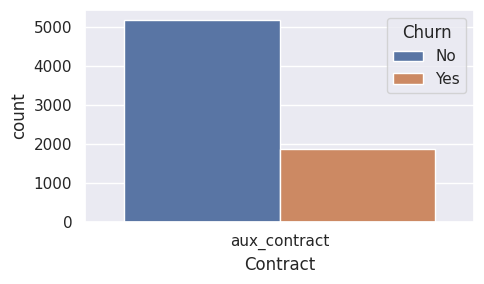

In [46]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['Contract'], hue='Churn')

plt.show()

Clientes que possuem contrato mensal são os que tendem a deixar a empresa. Ou seja, oferecer contrato anual ou de dois anos são as melhores opções.

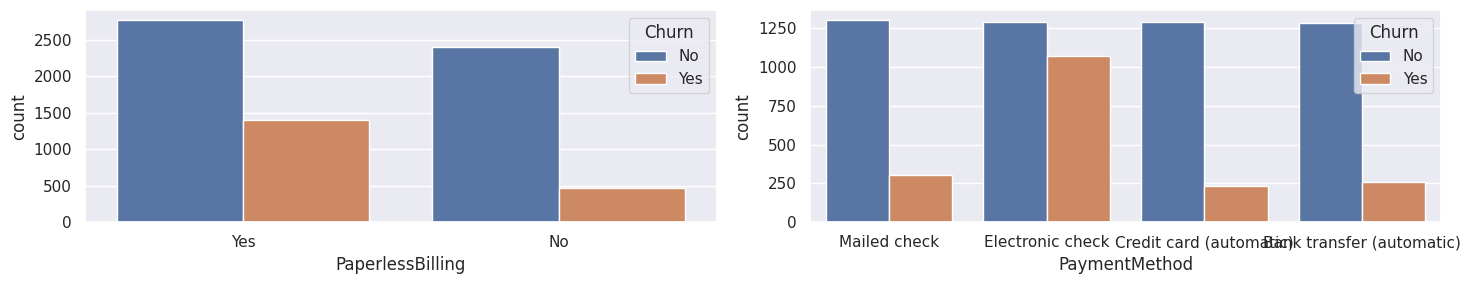

In [47]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [15,3]

# definindo os subplots
f, axes = plt.subplots(1,2)

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['PaperlessBilling'], hue='Churn', ax=axes[0])
sns.countplot(data = churn, x =churn['PaymentMethod'], hue='Churn', ax=axes[1])

plt.show()

Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da empresa. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos, como por exemplo cartão de crédito que é onde tem a menor taxa de cancelamento.

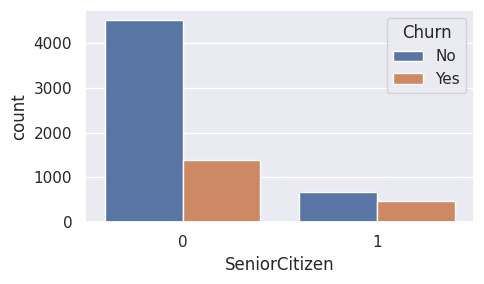

In [48]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['SeniorCitizen'], hue='Churn')

plt.show()

Apesar da quantidade de clientes idosos ser bem menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.

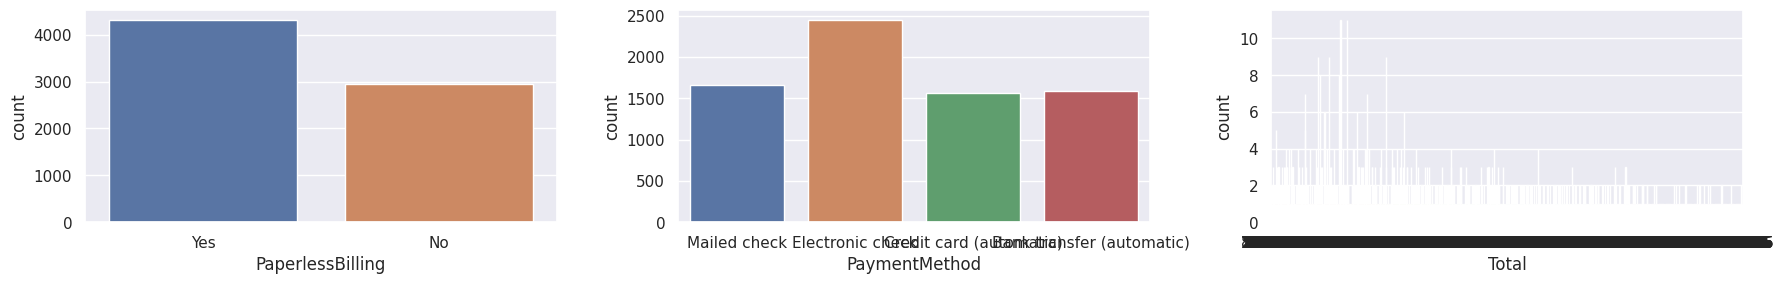

In [49]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [18,3]
plt.rcParams["figure.autolayout"] = np.True_

# definindo os subplots
f, axes = plt.subplots(1,3)

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['PaperlessBilling'], ax = axes[0])
sns.countplot(data = churn, x =churn['PaymentMethod'], ax = axes[1])
sns.countplot(data = churn, x =churn['Total'], ax = axes[2])
plt.show()


Como a variável "Total" possui muitos valores, vamos reescreve-la em faixas de valores

## Correlação dos dados

<ipython-input-50-6d68423a028a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn.corr(), annot = False, cmap='seismic')


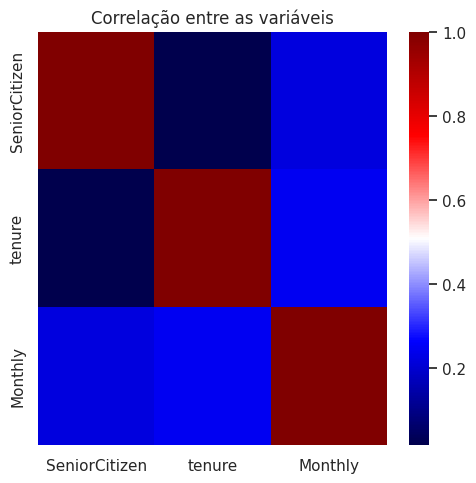

In [50]:
plt.figure(figsize=(5, 5))
sns.heatmap(churn.corr(), annot = False, cmap='seismic')
plt.title('Correlação entre as variáveis')
plt.show()

# salva a imagem em um arquivo PNG
#plt.savefig('corr_heatmap.png')

As variáveis "tenue" e "Senior" são correlacionadas, ou seja, ambas carregam o mesmo tipo de informação. Logo, trabalhar apenas com uma delas, descartando a outra.

In [51]:
# Salva a nova base dos dados em um csv
# Retira o index pra não ser gerado dois indeces na leitura

churn.to_csv('churn.csv', index=False)

# 2° Semana - Construção e otimização de um modelo de ML 📊

A propoosta da segunda semana é ter uma base limpa para a construção do primeiro modelo de classificação, que por sua vez, indicará se o cliente tenderá a sofrer um churn, ou seja, se ele vai ou não sair da base.

In [52]:
# leitura da base que foi salva

pd.read_csv('churn.csv')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,aux_contract,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,aux_contract,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,aux_contract,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,aux_contract,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,aux_contract,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,aux_contract,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,aux_contract,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,aux_contract,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,aux_contract,No,Mailed check,67.85,4627.65


Vamos remover algumas colunas que não serão utilizadas, como o ID (identidade do usuário) e a coluna Total, que é resultado da Monthly multiplicado pela tenure.

In [53]:
# Retirando a variável "CustomerID" e "Total"

churn.drop(columns=['customerID', 'Total'], axis = 1, inplace=True)
churn.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,aux_contract,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,aux_contract,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,aux_contract,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,aux_contract,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,aux_contract,Yes,Mailed check,83.9


# Engenharia de Features

In [54]:
# Imprime quais são e quantos são os valores únicos de cada coluna

# gera uma lista com as coluna do dataframe
lista_colunas = churn.columns

# imprime a quantridade de valores números e quias são eles
for i in lista_colunas:
  print('**************')
  print(f'Quantidade de valores únicos:', len(churn[i].unique()))
  print(f'Valores únicos da coluna:', i , churn[i].unique())

**************
Quantidade de valores únicos: 3
Valores únicos da coluna: Churn ['No' 'Yes' nan]
**************
Quantidade de valores únicos: 2
Valores únicos da coluna: gender ['Female' 'Male']
**************
Quantidade de valores únicos: 2
Valores únicos da coluna: SeniorCitizen [0 1]
**************
Quantidade de valores únicos: 2
Valores únicos da coluna: Partner ['Yes' 'No']
**************
Quantidade de valores únicos: 2
Valores únicos da coluna: Dependents ['Yes' 'No']
**************
Quantidade de valores únicos: 73
Valores únicos da coluna: tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
**************
Quantidade de valores únicos: 2
Valores únicos da coluna: PhoneService ['Yes' 'No']
**************
Quantidade de valores únicos: 3
Valores únicos da coluna: MultipleLines ['No' 'Yes' 'No phone service']

Observamos que em alguns casos existem três colunas: 'No' 'Yes' 'No internet service' para esse terceiro caso vamos padronizar tudo para 'No',  ou seja, sem o serviço.

E para os casos de 'Yes' e 'No' vamos subistituir por 1 e 0.

In [55]:
dicionario = {'No internet service':0,
              'No phone service': 0,
              'No': 0,
              'Yes': 1,
              'Male':0,
              'Female':1}

In [56]:
# selecionando as colunas que deseja alterar

colunas = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Monthly']

churn[colunas] = churn[colunas].replace(dicionario)

# LabelEncoder

In [57]:
# separando as variáveis que são categóricas

for i in churn.select_dtypes(include=['object']).columns:
       print(f"{i}: {churn[i].unique()}")

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['aux_contract']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [58]:
# cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variávceis
churn['InternetService'] = lb.fit_transform(churn['InternetService'])
churn['Contract'] = lb.fit_transform(churn['Contract'])
churn['PaymentMethod'] = lb.fit_transform(churn['PaymentMethod'])

In [59]:
churn

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly
0,0.0,1,0,1,1,9,1,0,0,0,1,0,1,1,0,0,1,3,65.60
1,0.0,0,0,0,0,9,1,1,0,0,0,0,0,0,1,0,0,3,59.90
2,1.0,0,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,2,73.90
3,1.0,0,1,1,0,13,1,0,1,0,1,1,0,1,1,0,1,2,98.00
4,1.0,1,1,1,0,3,1,0,1,0,0,0,1,1,0,0,1,3,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1,0,0,0,13,1,0,0,1,0,0,1,0,0,0,0,3,55.15
7263,1.0,0,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,2,85.10
7264,0.0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,3,50.30
7265,0.0,0,0,1,1,67,1,0,0,1,0,1,1,0,1,0,0,3,67.85


In [60]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   int64  
 16  PaperlessBilling  7267 non-null   int64  


In [61]:
# Agora como todas as variáveis são numéricas, conseguimos fazer o describe de todas elas
# esse T no final da linha, imprime a matriz transposta, pelo fato de termos muitas colunas, que agora são linhas.

churn.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.0,1.000,1.00
gender,7267.0,0.494289,0.500002,0.00,0.000,0.0,1.000,1.00
SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
Partner,7267.0,0.484106,0.499782,0.00,0.000,0.0,1.000,1.00
Dependents,7267.0,0.300124,0.458343,0.00,0.000,0.0,1.000,1.00
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
PhoneService,7267.0,0.902711,0.296371,0.00,1.000,1.0,1.000,1.00
MultipleLines,7267.0,0.421770,0.493876,0.00,0.000,0.0,1.000,1.00
InternetService,7267.0,0.875189,0.737852,0.00,0.000,1.0,1.000,2.00
OnlineSecurity,7267.0,0.285950,0.451897,0.00,0.000,0.0,1.000,1.00


In [62]:
# Salva a nova base em um csv que será utilizada na 3° semana
# Retira o index pra não ser gerado dois indeces na leitura

churn.to_csv('churn.csv', index=False)

In [63]:
# leitura da base que foi salva

pd.read_csv('churn.csv')

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly
0,0.0,1,0,1,1,9,1,0,0,0,1,0,1,1,0,0,1,3,65.60
1,0.0,0,0,0,0,9,1,1,0,0,0,0,0,0,1,0,0,3,59.90
2,1.0,0,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,2,73.90
3,1.0,0,1,1,0,13,1,0,1,0,1,1,0,1,1,0,1,2,98.00
4,1.0,1,1,1,0,3,1,0,1,0,0,0,1,1,0,0,1,3,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1,0,0,0,13,1,0,0,1,0,0,1,0,0,0,0,3,55.15
7263,1.0,0,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,2,85.10
7264,0.0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,3,50.30
7265,0.0,0,0,1,1,67,1,0,0,1,0,1,1,0,1,0,0,3,67.85


# Valores nulos

In [64]:
# verifica se alguma variável possui valores faltantes

churn.isna().sum()

Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Monthly               0
dtype: int64

A varíável Churn é a única qiue possui valores nulos

In [65]:
# Como são poucas as linhas que possuem valores faltantes
# vamos dropa-las

churn.dropna(subset=['Churn'], inplace = True)

# Balanceamento dos dados

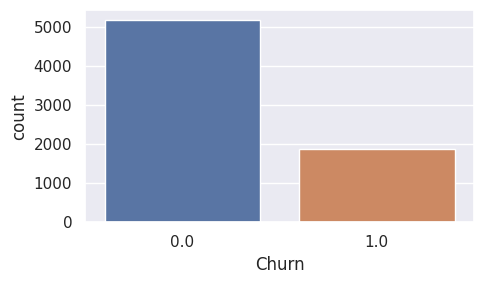

In [66]:
# definie o tamanho dos gráficos
plt.rcParams["figure.figsize"] = [5,3]

# coloca cada informação em um plot distinto
sns.countplot(data = churn, x =churn['Churn'])

plt.show()

Podemos ver claramente que existe um desbalanceamento entre os dados. Para contornar essa situação, vamos realizar o SMOTE dos dados.

Mas antes,  vamos dividir o conjunto de dados em treino e teste e, apenas o conjunto de treino receberá o método.

## Divisão dos conjuntos treino e teste

In [67]:
# Separando os dados em X, que contém os dados de entrada, e y que contém os dados de saída
X = churn.drop(['Churn'], axis = 1)
y = churn['Churn']

# Separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, test_size=0.3, random_state=SEED, stratify=y)

In [68]:
# Vamos realizar o balanceamento dos dados com o métod SMOTE

# instânciando o método
smote = SMOTE(random_state=42)

# balanceamento dos conjuntos de treino
X_treino_smote, y_treino_smote = smote.fit_resample(X_treino, y_treino)
print('Conjunto de dados após o balanceamento: %s' % Counter(y_treino_smote))

Conjunto de dados após o balanceamento: Counter({0.0: 3622, 1.0: 3622})


In [69]:
# Conferindo o conjunto de teste

print('Conjunto de dados após o balanceamento: %s' % Counter(y_teste))

Conjunto de dados após o balanceamento: Counter({0.0: 1552, 1.0: 561})


# Primeiro Modelo - Árvore de decisão

In [70]:
# instânciando o modelo
dt = DecisionTreeClassifier(random_state= SEED)

# realizando o fit do modelo
dt.fit(X_treino_smote, y_treino_smote)

# predição no conjunto de teste
y_pred_dt = dt.predict(X_teste)

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1552
         1.0       0.48      0.54      0.51       561

    accuracy                           0.72      2113
   macro avg       0.65      0.67      0.66      2113
weighted avg       0.74      0.72      0.73      2113



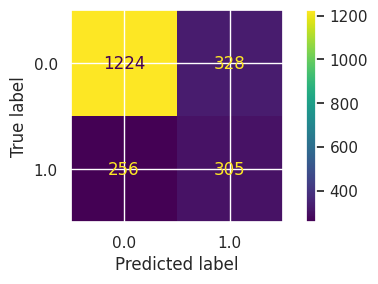

In [71]:
# plota a matriz de confusão
print(classification_report(y_teste,y_pred_dt))

# plota as métricas de classificação
acc = accuracy_score(y_teste,y_pred_dt)
precision = precision_score(y_teste,y_pred_dt,average='micro')
recall = recall_score(y_teste,y_pred_dt,average='micro')
f1 = f1_score(y_teste,y_pred_dt,average='micro')
ConfusionMatrixDisplay.from_predictions(y_teste,y_pred_dt)
plt.show()

# Segundo Modelo - Randon Forest

In [72]:
rf = RandomForestClassifier(max_depth=7, random_state=SEED)
rf.fit(X_treino_smote, y_treino_smote)
y_pred_rf = rf.predict(X_teste)

              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82      1552
         1.0       0.52      0.72      0.61       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



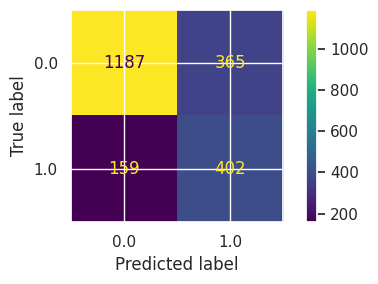

In [73]:
# plota a matriz de confusão
print(classification_report(y_teste,y_pred_rf))

# plota as métricas de classificação
acc = accuracy_score(y_teste,y_pred_rf)
precision = precision_score(y_teste,y_pred_rf,average='micro')
recall = recall_score(y_teste,y_pred_rf,average='micro')
f1 = f1_score(y_teste,y_pred_rf,average='micro')
ConfusionMatrixDisplay.from_predictions(y_teste,y_pred_rf)
plt.show()

# Terceiro Modelo - Ada Boosting

In [74]:
ada = AdaBoostClassifier(random_state=SEED)
ada.fit(X_treino_smote, y_treino_smote)
y_pred_ada = ada.predict(X_teste)

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1552
         1.0       0.53      0.68      0.59       561

    accuracy                           0.75      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.75      0.76      2113



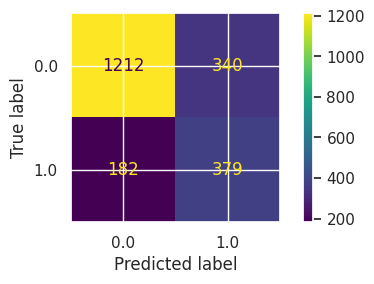

In [75]:
# plota a matriz de confusão
print(classification_report(y_teste,y_pred_ada))

# plota as métricas de classificação
acc = accuracy_score(y_teste,y_pred_ada)
precision = precision_score(y_teste,y_pred_ada,average='micro')
recall = recall_score(y_teste,y_pred_ada,average='micro')
f1 = f1_score(y_teste,y_pred_ada,average='micro')
ConfusionMatrixDisplay.from_predictions(y_teste,y_pred_ada)
plt.show()

# Comparando os três modelos

Para decidir qual o melhor modelo, vamos olhar para a métrica dos três modelos, apresentados:



*   Acurácia: mede o quanto o modelo está acertando com relação a todas as classes. Mas, se o conjunto de dados for desbalanceado, a acurácia pode ser tendenciosa, não sendo uma boa medida para esses casos.
*   Precision ou precisão: mede os casos de churn previsto pelo modelo classificou como sendo realmente churn. Ou seja, modelos com valores altos de precisão significa que o modelo acerta os casos que são realmente casos de churn, ou ainda, os casos positivos.
*   Recall: mede a proporção real de churn, ou seja, modelos com altos valores de recall significa que esses modelos são bons em detectar casos de churn.
*   F1-Score: é a média harmônica entre Precision e o Recall, que para o nosso caso, é a combinação da duas métricas que são mais importantes para o nosso problema.

Nesse comtexto de Churn, queremos um modelo que classifique da melhor forma possível os casos que poderiam dar churn, ou seja, modelos com alto valores de Recall.

Logo, vamos escolher um modelo que traga os maiores valores de F1-Score, que neste caso é Rando Forest.





## Tuning do modelo - Random Forest

Para realizar o Tuning dos hiperparãmetros, vamos utilizar o GridSearchCV; para a otimização.

In [76]:
# definindo os hiperparametros

# qtd de arvores utilizadas
n_estimators = np.arange(100, 200, step=20)
# crterio de decisao
criterion = ["gini", "entropy"]
# profundidade máxima da árvore de decisão;
max_depth = list(np.arange(2, 10, step=2))
# número mínimo de amostras necessárias para que uma divisão seja feita;
min_samples_split = np.arange(2, 10, step=2)
# número mínimo de amostras necessárias para que uma folha seja formada;
min_samples_leaf = [2, 4]
# indica se foi realizada uma reamostragem dos dados na criação dos modelos de árvore de decisão
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [77]:
# instancia o modelo com os hiperparametros escolhidos

clf = GridSearchCV(RandomForestClassifier(random_state=SEED), parameters, cv=5, scoring="f1")
clf.fit(X_treino_smote, y_treino_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             scoring='f1')

In [78]:
# analisando os resultados

pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
451,0.698040,0.095963,0.034929,0.003278,False,gini,8,2,6,120,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.751098,0.754552,0.866582,0.852941,0.860090,0.817053,0.052630,1
444,1.136274,0.198292,0.053129,0.006293,False,gini,8,2,2,180,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.751648,0.751276,0.867516,0.853846,0.860645,0.816986,0.053675,2
449,0.949443,0.005297,0.047874,0.002551,False,gini,8,2,4,180,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.751648,0.751276,0.867516,0.853846,0.860645,0.816986,0.053675,2
450,0.672092,0.138149,0.034043,0.003514,False,gini,8,2,6,100,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.751098,0.755102,0.868237,0.852585,0.857878,0.816980,0.052415,4
448,0.968759,0.193009,0.044910,0.007094,False,gini,8,2,4,160,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.751648,0.753644,0.866794,0.853846,0.858430,0.816873,0.052608,5


In [79]:
# selecionando o melhor deles

clf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 120}

In [82]:
# gera um estimador com os melhores resultados
best_clf = clf.best_estimator_

# faz uma nova predicao
y_pred = best_clf.predict(X_teste)


              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      1552
         1.0       0.52      0.70      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.75      0.76      2113



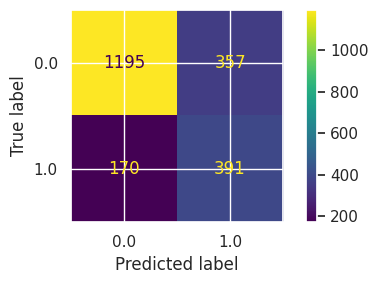

In [83]:
# verifica a nova matriz de decisão  do novo modelo

# plota a matriz de confusão
print(classification_report(y_teste,y_pred))

# plota as métricas de classificação
acc = accuracy_score(y_teste,y_pred)
precision = precision_score(y_teste,y_pred,average='micro')
recall = recall_score(y_teste,y_pred,average='micro')
f1 = f1_score(y_teste,y_pred,average='micro')
ConfusionMatrixDisplay.from_predictions(y_teste,y_pred)
plt.show()

# Salvando o modelo Otimizado

In [86]:
from sklearn.metrics import f1_score
import pickle

# Salvando o nome do modelo dinamicamente
f1 = f1_score(y_teste, y_pred)
nome_modelo = type(best_clf).__name__
#path = ".../Documentos/repositorio/Challenge dados/"
path ="/content/drive/MyDrive/Colab Notebooks/Challenge-Dados"



# Converte o f1-score em string
f1_str = str(round(f1, 4))

# Salvando o modelo
with open(path + nome_modelo + '_f1_' + f1_str + '.pkl', 'wb') as file:
    pickle.dump(best_clf, file)